# 문제 1
- 가장 긴 증가하는 부분 수열
- https://www.acmicpc.net/problem/11053

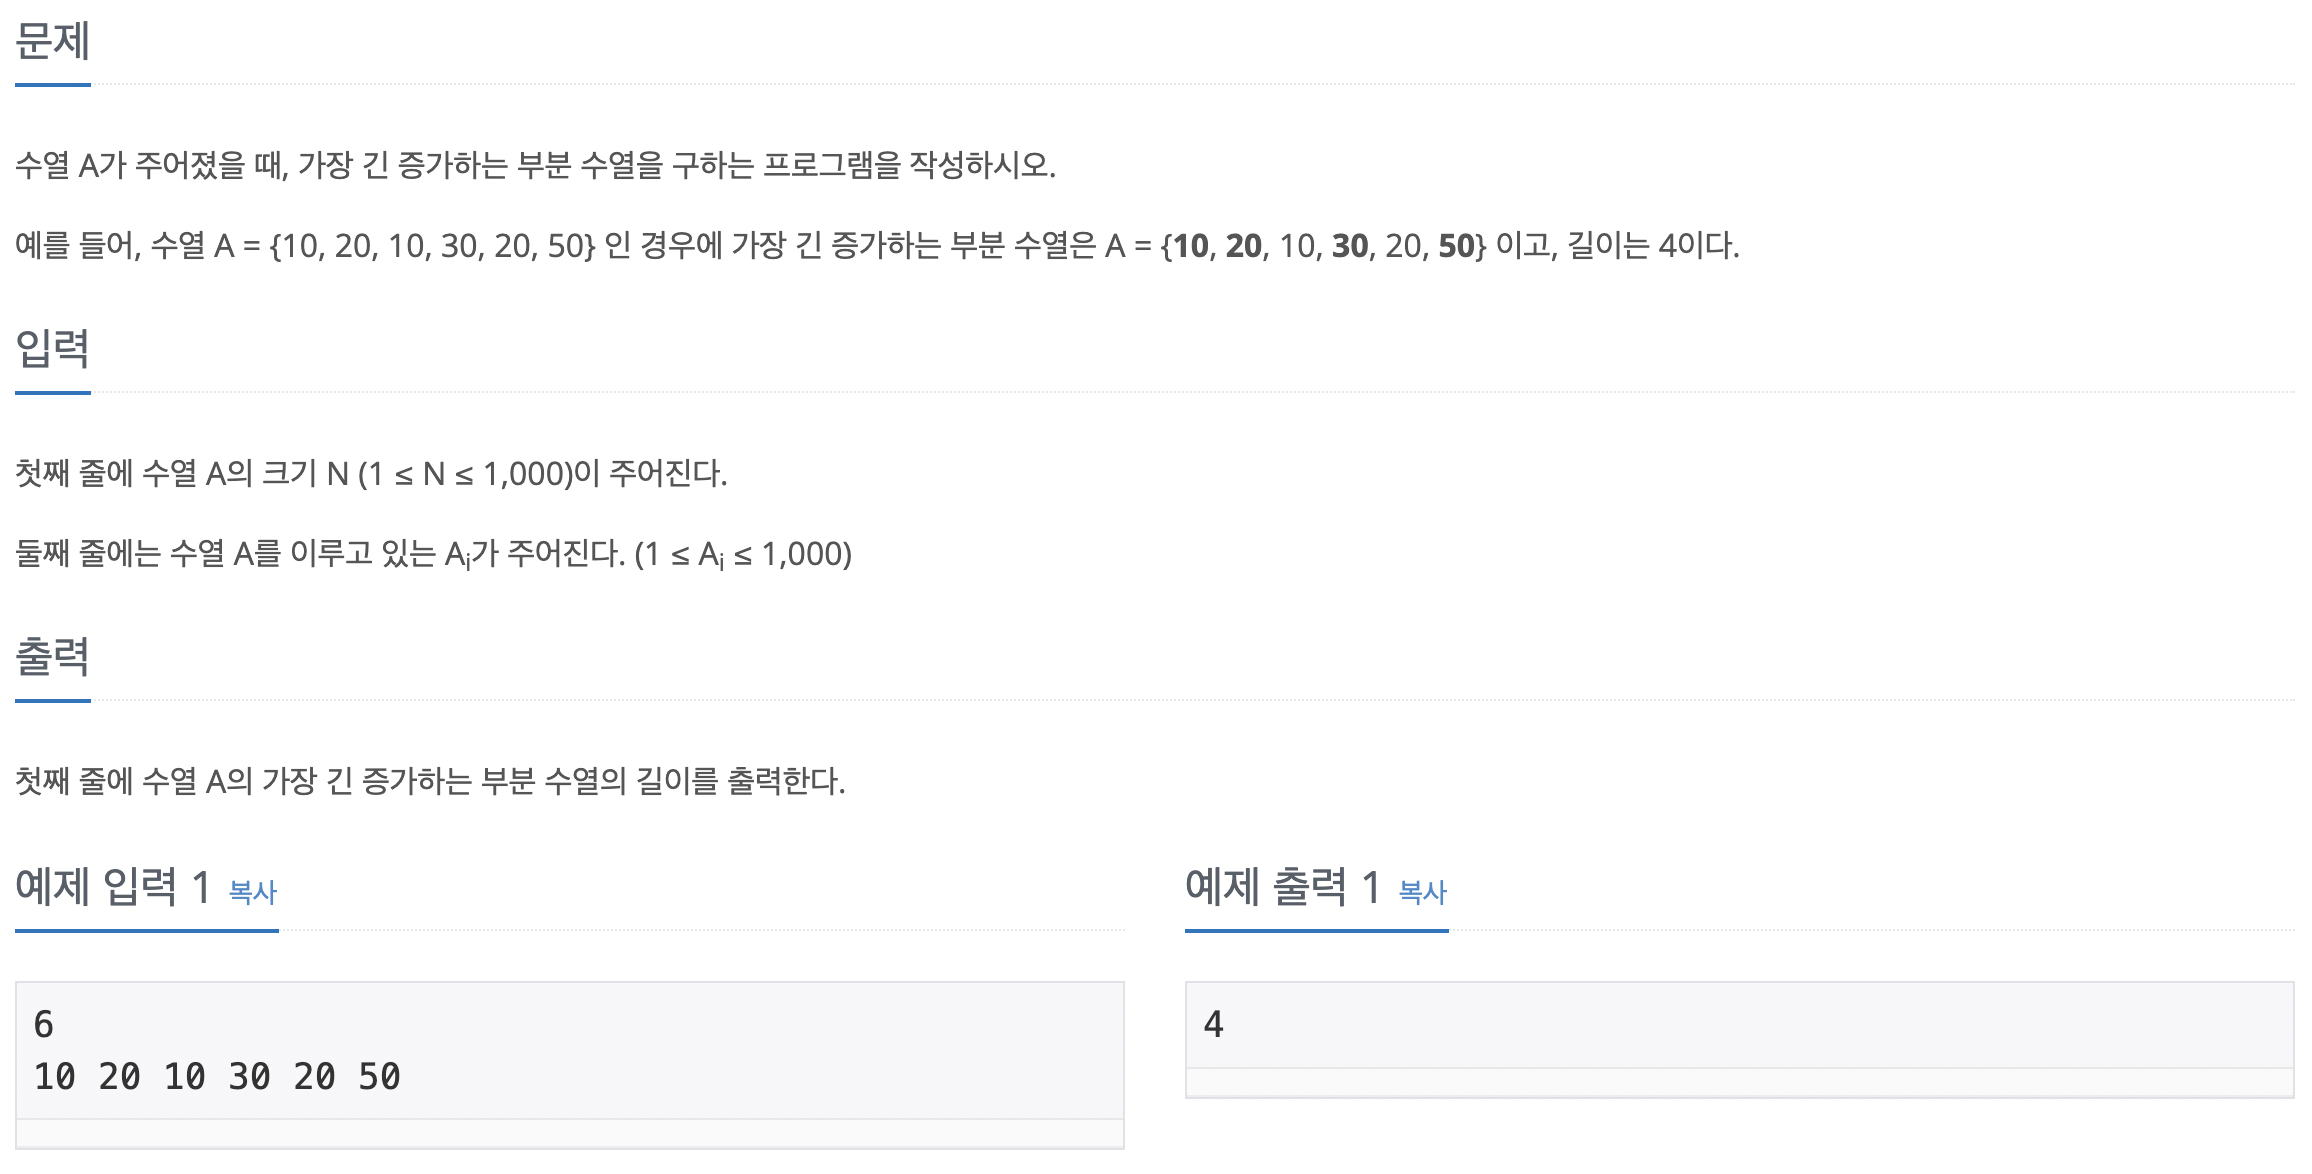

## Step
- 기본적으로 모든 수열의 값은 1번 연속증가하는 수열로 간주한다.
- 만약 검사하려는 인덱스보다 앞의 인덱스에 자기 보다 작은 값이 존재한다면, 그 값에 이어서 +1을 해준다.

### 이중 for문을 돌리지 않아서 예제만 통과하고 실패하는 경우를 반복했다

In [30]:
N = int(input())
A = list(map(int, input().split()))

dp = [1] * N

for i in range(N):
    for j in range(i):
        if A[i] > A[j]:
            dp[i] = max(dp[j]+1, dp[i])
    
print(max(dp))

6
1 2 1 3 2 5
4


In [31]:
dp

[1, 2, 1, 3, 2, 4]

# 문제 2
- LCS
- https://www.acmicpc.net/problem/9251

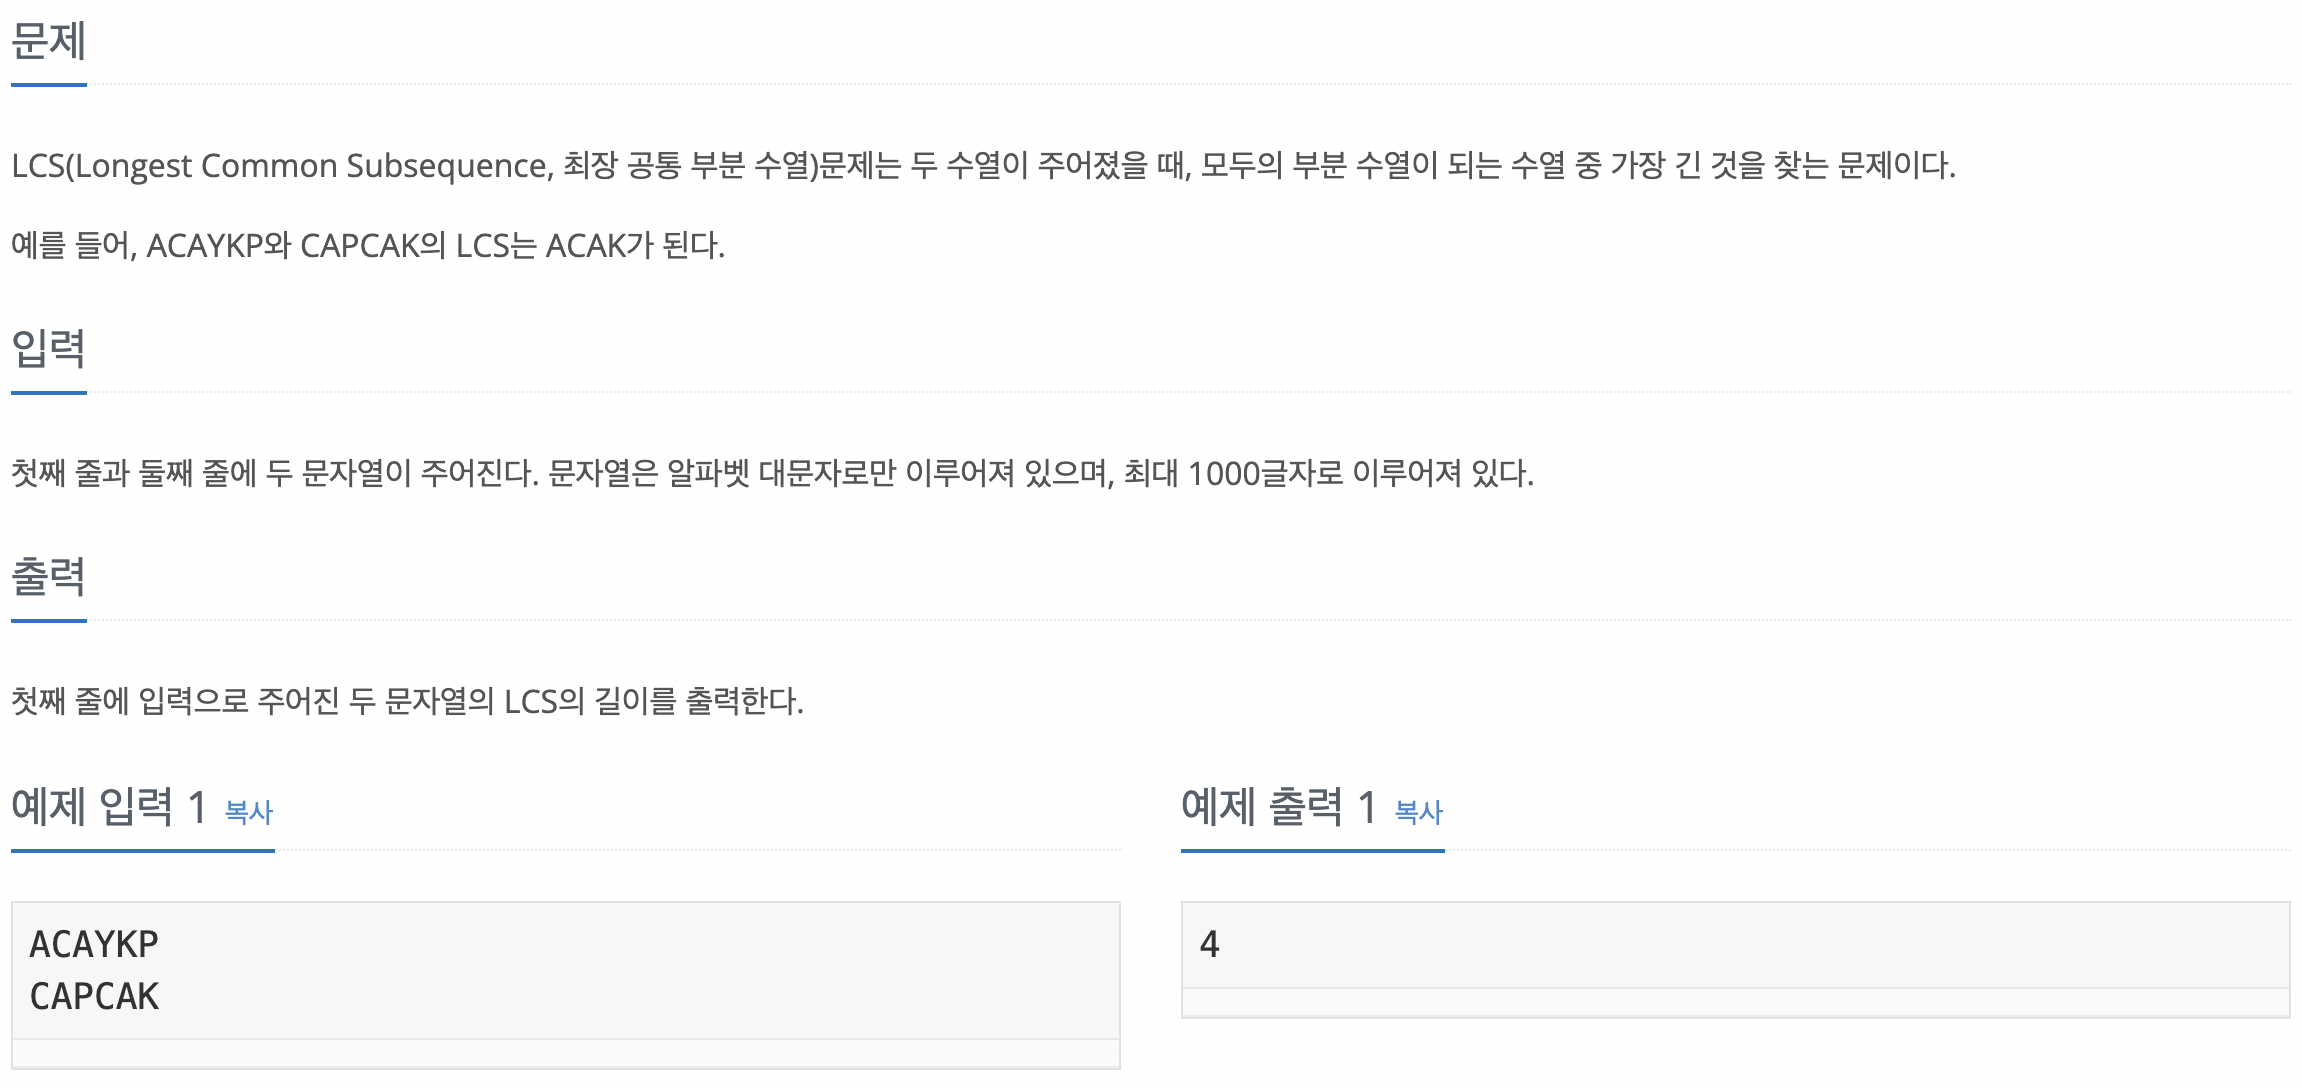

## Step
- 풀이를 참고해서 풀었음
- https://myjamong.tistory.com/317

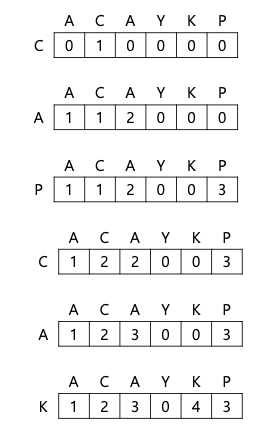

- 글자 하나를 기준으로 1차원 배열을 만들어주고 같은 글자를 순회하는 경우 누적 값에서 1을 더한 값을 넣어주는 방식이다. 순회할 때마다 누적값을 저장할 변수를 하나 사용하고 만약 글자가 다른 경우 누적 변수의 값이 해당 위치의 값보다 작은 경우 해당 값으로 교체해준다. 이렇게 하면 누적 값에는 이전 위치까지 까지의 최대값이 계속해서 저장된다.

In [34]:
A = input()
B = input()

dp = [0] * len(B)

for i in range(len(A)):  # A문자열 각각의 원소에 대해서
    cnt = 0              # 누적값 저장 변수
    for j in range(len(B)):   # B문자열 하나씩 뜯어보는데,
        if cnt < dp[j]:       # 만약 현재 cnt가 dp 값 보다 작다면, (앞에 같은 문자가 나왔을 경우이다.)
            cnt = dp[j]       # cnt를 갱신해줘라
        elif A[i] == B[j]:    # 그렇지 않고, 같은 문자열이 나오면,   (이 부분이 가장 먼저 실행이 될 것임)
            dp[j] = cnt + 1   # 그 문자열의 cnt값에 +1을 해줘라
print(max(dp))

ACAYKP
CAPCAK
4


# 문제 3
- 평범한 배낭
- https://www.acmicpc.net/problem/12865

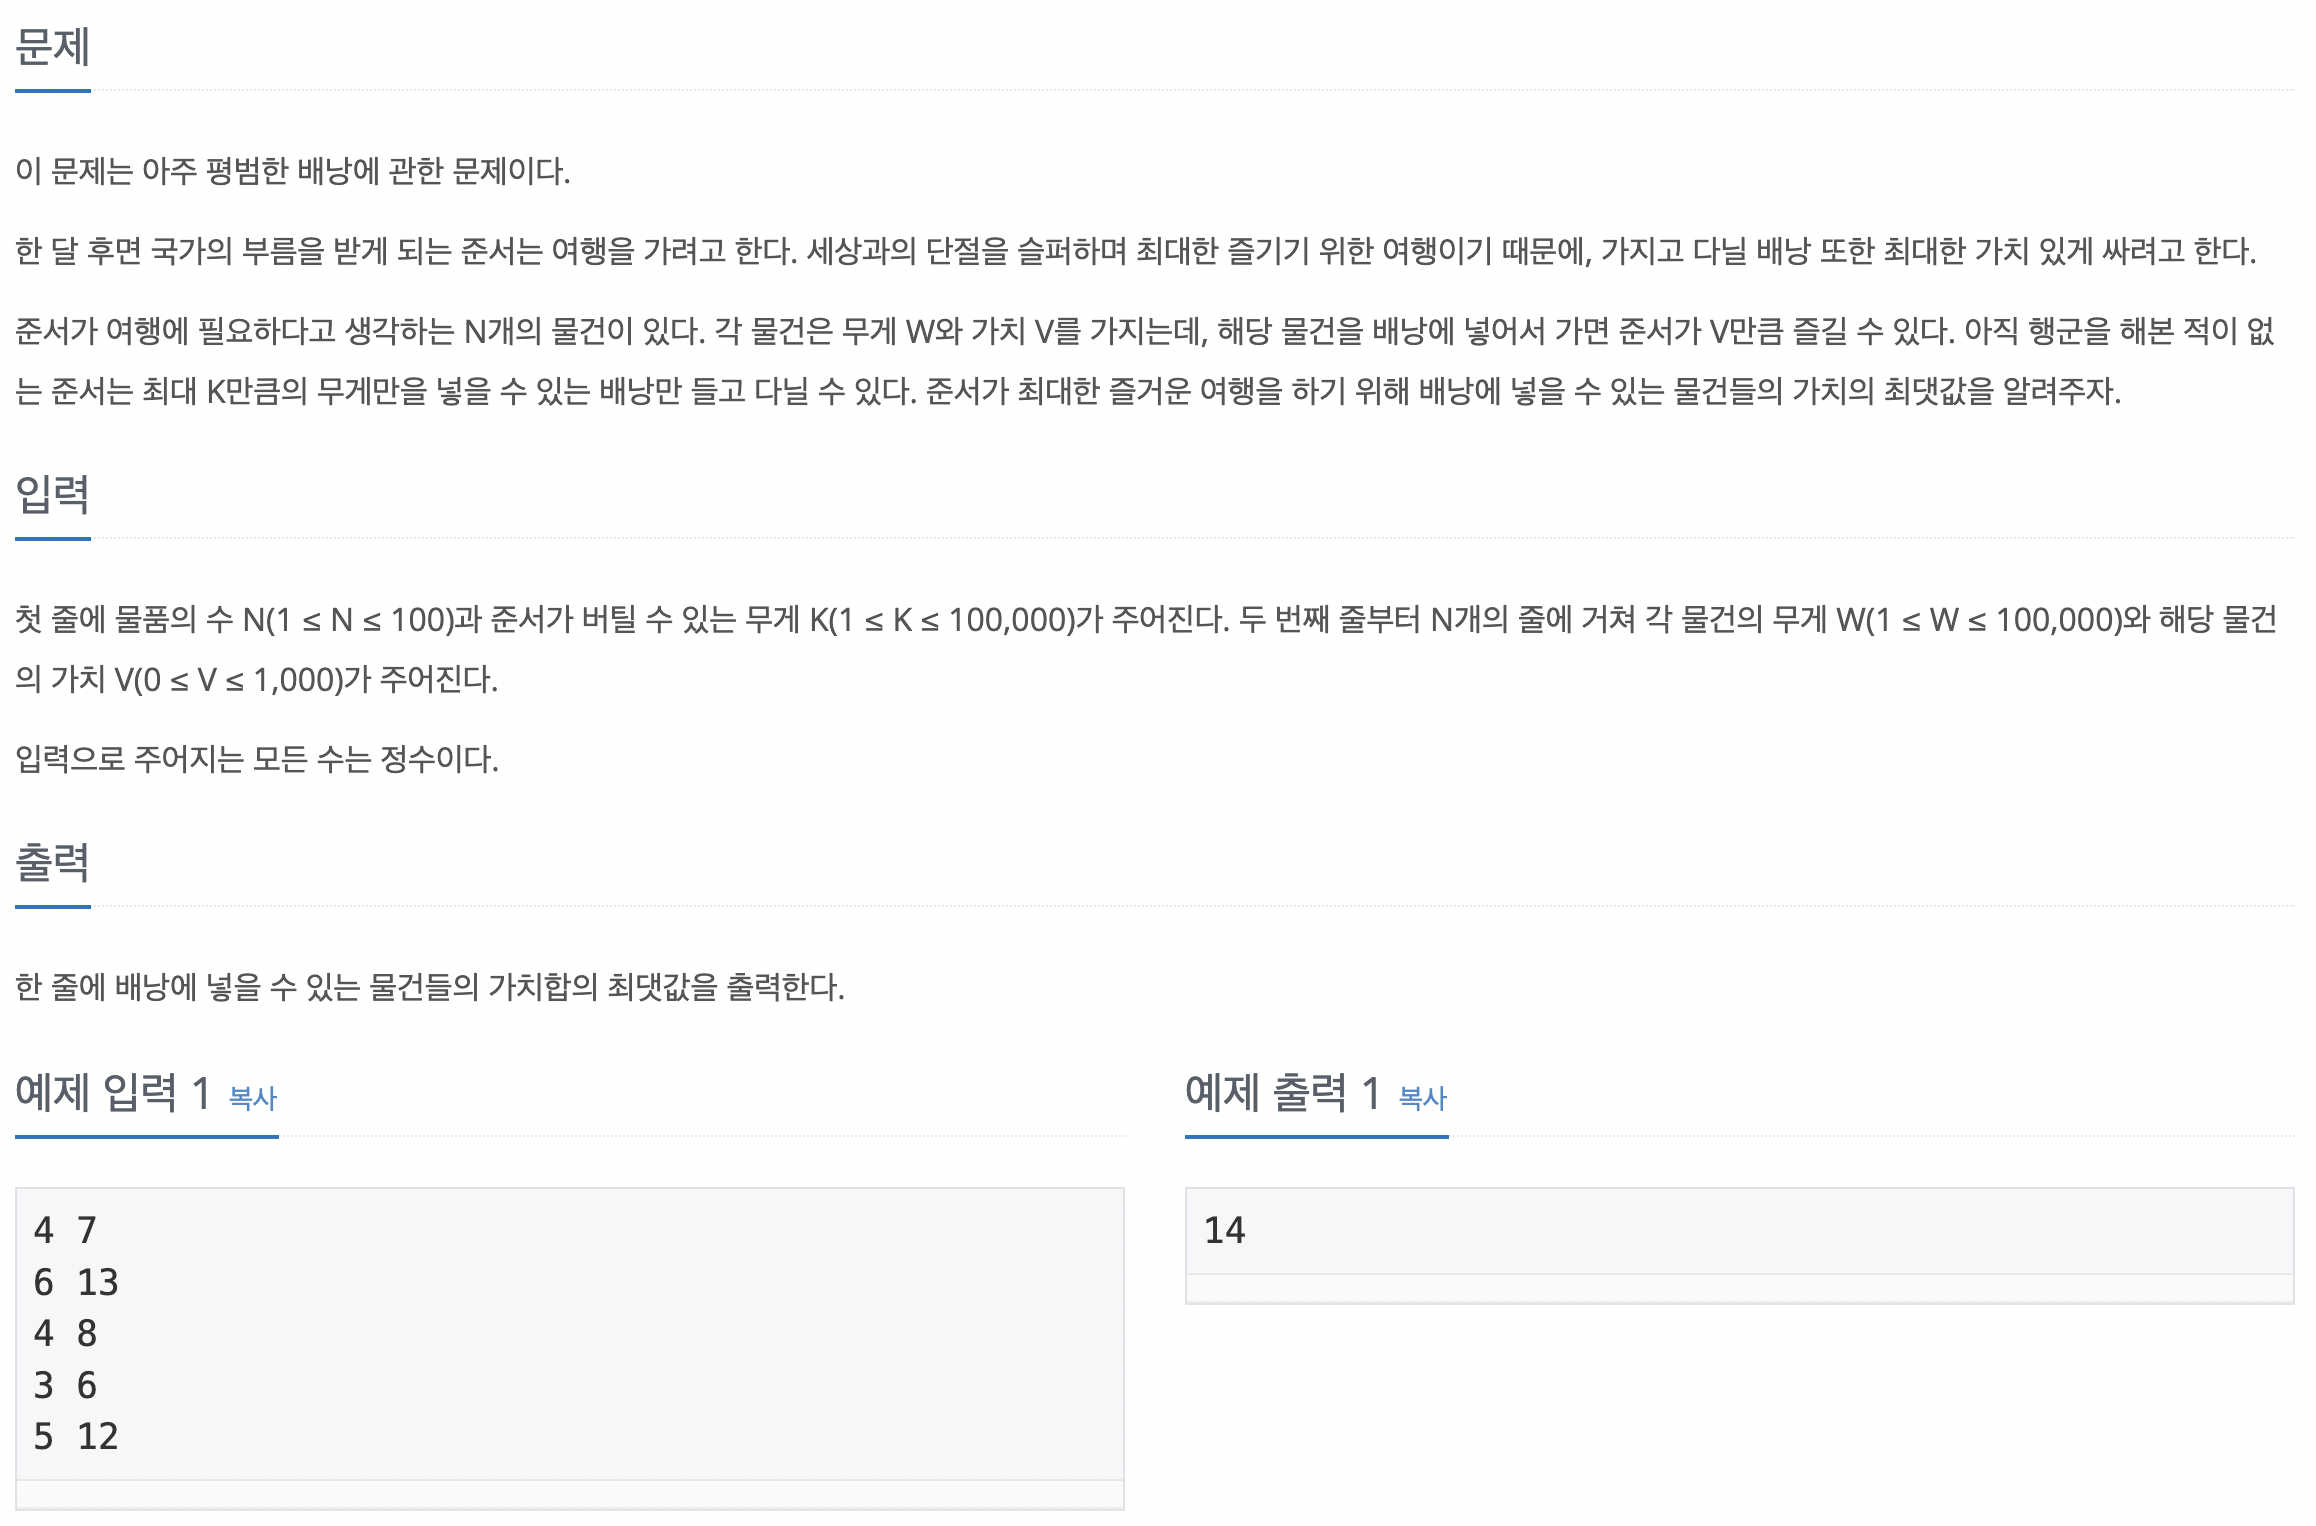

## Step
- 무게별 최대 가치를 기록
- 전체 무게중 최대 가치 도출

In [65]:
n, k = map(int, input().split())

thing = [[0,0]]
d = [[0]*(k+1) for _ in range(n+1)]

for i in range(n):
    thing.append(list(map(int, input().split())))

for i in range(1, n+1):
    for j in range(1, k+1):
        w = thing[i][0]
        v = thing[i][1]

        if j < w:
            d[i][j] = d[i-1][j]
        else:
            d[i][j] = max(d[i-1][j], d[i-1][j-w]+v)

print(d[n][k])

6 13
4 8
3 6
5 12
14


In [67]:
thing

[[0, 0], [6, 13], [4, 8], [3, 6], [5, 12]]

In [66]:
d

[[0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 13, 13],
 [0, 0, 0, 0, 8, 8, 13, 13],
 [0, 0, 0, 6, 8, 8, 13, 14],
 [0, 0, 0, 6, 8, 12, 13, 14]]

---
---
#### test code

In [68]:
n, k = map(int, input().split())
item = {}

for _ in range(n):
    w,v = map(int,input().split())
    item[w] = v

item

4 7
6 13
4 8
3 6
5 12


{6: 13, 4: 8, 3: 6, 5: 12}

In [71]:
dp = [0] * (k+1)
for w,v in item.items():
    dp[w] = max(dp[w],v)
dp

[0, 0, 0, 6, 8, 12, 13, 0]

In [ ]:
for i in range(1,k+1):
    if i < 